In [10]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from nltk.tag import pos_tag
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer


In [3]:
df= pd.read_csv("cleaned_wine_data.csv")

In [4]:
df

,Unnamed: 0,country,description,points,price,province,region,title,variety,winery
0,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,"Napa Valley, Napa",Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
4,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,"Alexander Valley, Sonoma",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
...,...,...,...,...,...,...,...,...,...,...
118481,129117,Canada,This young wine is still pulling itself togeth...,87,19.0,British Columbia,"Okanagan Valley,",Tinhorn Creek 2013 Chardonnay (Okanagan Valley),Chardonnay,Tinhorn Creek
118482,129471,Canada,Coming from five different vineyards across th...,88,13.0,Ontario,"Niagara Peninsula,",Cave Spring 2011 Riesling (Niagara Peninsula),Riesling,Cave Spring
118483,129485,Canada,A youthful and appealing wine with notes of or...,88,50.0,Ontario,"Short Hills Bench,",Henry of Pelham 2012 Icewine Riesling (Short H...,Riesling,Henry of Pelham
118484,129528,Canada,A delicious though somewhat reserved wine with...,89,45.0,Ontario,"Niagara Peninsula,",Henry of Pelham 2011 Icewine Vidal (Niagara Pe...,Vidal,Henry of Pelham


In [5]:
country_values = df.groupby('country')['country'].count().sort_values(ascending=False)
country_values[:15]

country
US              53998
France          17322
Italy           16693
Spain            6504
Portugal         4839
Chile            4402
Argentina        3742
Austria          2797
Australia        2261
Germany          2056
New Zealand      1378
South Africa     1290
Israel            489
Greece            461
Canada            254
Name: country, dtype: int64

In [6]:
countries_to_keep = ['US','France', 'Italy','Spain','Portugal','Chile','Argentina', 'Austria', 'Australia','Germany','New Zealand', 'South Africa', 'Israel','Greece','Canada']

In [7]:
filtered_df = df[df['country'].isin(countries_to_keep)]

In [8]:
unique_varieties = filtered_df['variety'].unique()

In [10]:
len(filtered_df['variety'].unique())

647

--- Data Cleaning

In [11]:
def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('N'):
        return 'n'
    elif treebank_tag.startswith('V'):
        return 'v'
    elif treebank_tag.startswith('R'):
        return 'r'
    elif treebank_tag.startswith('J'):
        return 'a'
    else:
        return 'n'

def cleaning(sentence):


    sentence = sentence.strip() ## remove whitespaces
    sentence = sentence.lower() ## lowercase
    sentence = ''.join(char for char in sentence if not char.isdigit()) ## remove numbers


    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') ## remove punctuation

    tokenized_sentence = word_tokenize(sentence) ## tokenize
    stop_words = set(stopwords.words('english')) ## define stopwords

    tokenized_sentence_cleaned = [ ## remove stopwords
        w for w in tokenized_sentence if not w in stop_words
    ]

    lemmatized = [
        WordNetLemmatizer().lemmatize(word, pos=get_wordnet_pos(pos_tag))
        for word, pos_tag in pos_tag(tokenized_sentence_cleaned)
    ]


    cleaned_sentence = ' '.join(word for word in lemmatized)

    return cleaned_sentence

In [12]:
df["processed_description"] = df["description"].apply(cleaning)

In [13]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1500)

# Fit and transform the processed descriptions
tfidf_matrix = tfidf_vectorizer.fit_transform(df['processed_description'])

In [14]:
vectorized_documents = pd.DataFrame(tfidf_matrix.toarray(),columns = tfidf_vectorizer.get_feature_names_out())
vectorized_documents

,accent,acid,acidity,add,aftertaste,age,alcohol,almond,almost,along,...,wine,winery,wood,would,year,yellow,yet,young,zest,zesty
0,0.000000,0.0,0.213094,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.153838,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.133994,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.108105,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.386371,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.152415,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118481,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.089316,0.0,0.0,0.0,0.0,0.0,0.0,0.231367,0.000000,0.0
118482,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.144453,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.404665,0.0
118483,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.132215,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0
118484,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.115432,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0


In [15]:
list(vectorized_documents.columns)

['accent',
 'acid',
 'acidity',
 'add',
 'aftertaste',
 'age',
 'alcohol',
 'almond',
 'almost',
 'along',
 'alongside',
 'already',
 'also',
 'although',
 'anise',
 'appeal',
 'apple',
 'apricot',
 'aroma',
 'aromas',
 'aromatic',
 'around',
 'attractive',
 'back',
 'bake',
 'balance',
 'barrel',
 'berry',
 'best',
 'big',
 'bit',
 'bite',
 'bitter',
 'black',
 'blackberry',
 'blanc',
 'blend',
 'blossom',
 'blue',
 'blueberry',
 'body',
 'bold',
 'bottle',
 'bouquet',
 'bright',
 'bring',
 'brisk',
 'butter',
 'cab',
 'cabernet',
 'candy',
 'caramel',
 'carry',
 'cassis',
 'cedar',
 'cellar',
 'character',
 'chardonnay',
 'cherry',
 'chewy',
 'chocolate',
 'cinnamon',
 'citrus',
 'classic',
 'clean',
 'cleave',
 'close',
 'clove',
 'cocoa',
 'coffee',
 'cola',
 'color',
 'combine',
 'come',
 'complex',
 'complexity',
 'concentrate',
 'concentrated',
 'concentration',
 'core',
 'could',
 'cranberry',
 'creamy',
 'crisp',
 'crush',
 'currant',
 'cut',
 'dark',
 'deep',
 'delicate',
 'd

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer_n_gram = CountVectorizer(ngram_range = (1,2), min_df=0.02, max_df = 0.40) # BI-GRAMS
descriptions_vectorized_n_gram = count_vectorizer_n_gram.fit_transform(df['processed_description'])

# Show the representations in a nice DataFrame
descriptions_vectorized_n_gram = pd.DataFrame(
    descriptions_vectorized_n_gram.toarray(),
    columns = count_vectorizer_n_gram.get_feature_names_out(),

)

# Show the vectorized movies with bigrams
descriptions_vectorized_n_gram

,accent,acid,acidity,add,age,alcohol,almond,almost,along,alongside,...,whiff,white,wild,wood,year,yellow,yet,young,zest,zesty
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118481,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
118482,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
118483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
118484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1200x10000 with 0 Axes>

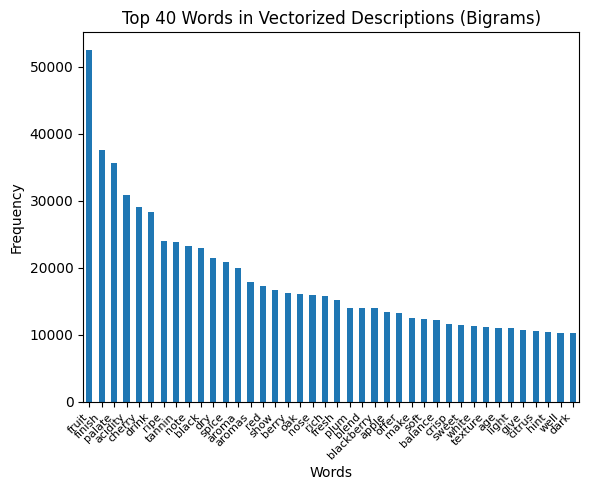

In [17]:
import matplotlib.pyplot as plt

# Calculate the sum of occurrences for each word
word_frequencies = descriptions_vectorized_n_gram.sum(axis=0)

# Create DataFrame
word_frequencies_df = pd.DataFrame(word_frequencies, columns=['Frequency'])

# Sort by frequency in descending order
word_frequencies_df = word_frequencies_df.sort_values(by='Frequency', ascending=False)

# Plot top 40 words
top_words = 40
plt.figure(figsize=(12, 100))
word_frequencies_df.head(top_words).plot(kind='bar', legend=None)
plt.title(f'Top {top_words} Words in Vectorized Descriptions (Bigrams)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.show()

In [18]:
list(descriptions_vectorized_n_gram.columns)

['accent',
 'acid',
 'acidity',
 'add',
 'age',
 'alcohol',
 'almond',
 'almost',
 'along',
 'alongside',
 'also',
 'anise',
 'apple',
 'apricot',
 'aroma',
 'aromas',
 'attractive',
 'back',
 'bake',
 'balance',
 'barrel',
 'berry',
 'berry fruit',
 'best',
 'big',
 'bit',
 'bitter',
 'black',
 'black cherry',
 'black currant',
 'black fruit',
 'black pepper',
 'blackberry',
 'blanc',
 'blend',
 'blueberry',
 'body',
 'bottle',
 'bright',
 'bring',
 'cabernet',
 'cabernet sauvignon',
 'candy',
 'carry',
 'cassis',
 'cedar',
 'character',
 'chardonnay',
 'cherry',
 'chocolate',
 'cinnamon',
 'citrus',
 'clean',
 'close',
 'coffee',
 'cola',
 'color',
 'come',
 'complex',
 'complexity',
 'concentrate',
 'concentration',
 'core',
 'cranberry',
 'creamy',
 'crisp',
 'crush',
 'currant',
 'dark',
 'deep',
 'delicate',
 'delicious',
 'delivers',
 'dense',
 'develop',
 'drink',
 'dry',
 'earth',
 'earthy',
 'easy',
 'edge',
 'elegant',
 'end',
 'enough',
 'feel',
 'fine',
 'finish',
 'firm',

In [19]:
from sklearn.decomposition import LatentDirichletAllocation


n_components = 20
lda_model = LatentDirichletAllocation(n_components=n_components)

# Fit the LDA on the vectorized documents
lda_model.fit(descriptions_vectorized_n_gram)

LatentDirichletAllocation(n_components=20)

In [20]:
document_topic_mixture = lda_model.transform(descriptions_vectorized_n_gram)
topic_word_mixture = pd.DataFrame(
    lda_model.components_,
    columns = count_vectorizer_n_gram.get_feature_names_out()
)

In [21]:
def print_topics(lda_model, vectorizer, top_words):
    # 1. TOPIC MIXTURE OF WORDS FOR EACH TOPIC
    topic_mixture = pd.DataFrame(
        lda_model.components_,
        columns = count_vectorizer_n_gram.get_feature_names_out()
    )

    # 2. FINDING THE TOP WORDS FOR EACH TOPIC
    ## Number of topics
    n_components = topic_mixture.shape[0]

    ## Top words for each topic
    for topic in range(n_components):
        print("-"*10)
        print(f"For topic {topic}, here are the the top {top_words} words with weights:")

        topic_df = topic_mixture.iloc[topic]\
            .sort_values(ascending = False).head(top_words)

        print(round(topic_df,3))

In [22]:
print_topics(lda_model, count_vectorizer_n_gram, 6)


----------
For topic 0, here are the the top 6 words with weights:
plum      5874.856
finish    5770.719
herbal    4868.103
red       4138.390
palate    3044.609
berry     3040.748
Name: 0, dtype: float64
----------
For topic 1, here are the the top 6 words with weights:
fruit        8603.002
age          6427.114
structure    5512.908
firm         5064.630
black        4641.697
drink        4539.860
Name: 1, dtype: float64
----------
For topic 2, here are the the top 6 words with weights:
light         4418.943
strawberry    4204.041
red           3903.118
palate        2592.866
fresh         2552.014
cherry        2443.808
Name: 2, dtype: float64
----------
For topic 3, here are the the top 6 words with weights:
fruit           9915.256
ripe            3916.578
fruit flavor    3865.176
freshness       2004.045
stone           1629.907
tropical        1530.821
Name: 3, dtype: float64
----------
For topic 4, here are the the top 6 words with weights:
orange     5101.632
honey      2619

1) Fruit Aromas: 
Citrus (Lemon, lime, grapefruit, orange)
Tree Fruits (Apple, pear, peach, apricot)
Berry Fruits (Strawberry, raspberry, blackberry, blueberry)
Tropical Fruits (Pineapple, mango, passion fruit)

2) Floral Aromas:

White Flowers (Jasmine, elderflower, acacia)
Blooming Flowers (Rose, violet, lavender)


3) Herbaceous Aromas:

Green Herbs (Mint, basil, eucalyptus)
Grassy (Fresh-cut grass, green bell pepper)

4) Spice aromas:
Pepper: Black pepper, white pepper.
Cinnamon, Clove, Nutmeg

5) Earth and Mineral Aromas:
Wet Stones (Mineral, flint)
Earthy (Soil, mushroom, forest floor)

6) Oak-Derived Aromas:
Vanilla
Toasty (Toasted bread, roasted nuts)
Smoky (Charred wood, campfire)

7) Sweet Aromas:
Honey, Caramel, Butterscotch

8) Chemical and Non-Food Aromas:
Tobacco

9) Botanical Aromas:
Eucalyptus, Pine

10) Baked Aromas:
Pie crust, pastry


In [23]:
# Aromas
fruity = ["apple", 'apricot', 'berry', 'berry fruit', 'black cherry', 'black currant', 'black fruit', 'blackberry', 'blueberry', 'cassis', 'cherry', "citrus", 'cranberry', 'currant', 'fruit', 'fruity', 'grape', 'grapefruit', 'lemon', 'lime', 'melon', 'orange', 'pineapple', 'raspberry', 'red berry', 'red fruit', "peach", "pear", "raspberry", "blueberry", "strawberry", "orange", "lime", "plum", "fruity", "fruit flavor", "tangerine"]
spicy = ['anise', 'black pepper', 'cinnamon', 'pepper', 'licorice', 'spice', 'spicy', 'clove', 'peppery']
herbal = ['green', 'herb', 'herbs', 'herbal', 'violet']
oaky = ['almond', 'vanilla', 'cedar', 'earth', 'earthy', 'leather', 'oak', 'wood', 'toasty', 'oaky', 'caramel', 'cola', 'roast', 'meat', 'smoky', 'smoke', 'tobacco', 'bake', 'savory']
chocolate_coffee = ['chocolate', 'coffee', 'espresso', 'mocha']
floral =  ['floral', 'flower', 'blossom', 'violet']
# Body
light_bodied = ["light", "lightly", "smooth"]
medium_bodied = ['medium', 'mediumbodied', 'juicy']
full_bodied = ['fullbodied', 'full', 'dense', 'rich', 'richness', 'bold', 'thick', 'chewy', 'lush', 'syrah']
# Texture
soft_texture = ['soft', 'mature']
creamy_texture = ['creamy']
structured_texture = ['structure', 'tannic']
silky_texture = ['silky', 'velvety', 'lush']
# Sweetness
sweet = ['sweet', 'rich', 'honey', 'candy', 'jammy', 'sweetness', 'sugar']
dry = ['acid', 'acidity', 'dry', 'off-dry', 'tart', 'mineral', 'crisp', 'bitter', 'minerality', 'refresh', 'tangy', 'zest', 'zesty', 'savory', 'bright', 'stone']


In [24]:
def encode_columns(row):
    # Sweet or dry
    sweet_wine = 1 if any(keyword in row['processed_description']for keyword in sweet) else 0
    dry_wine = 1 if any(keyword in row['processed_description']for keyword in dry) else 0

    # Aromas

    fruity_aroma = 1 if any(keyword in row['processed_description'] for keyword in fruity) else 0
    spicy_aroma = 1 if any(keyword in row['processed_description'] for keyword in spicy) else 0
    herb_aroma = 1 if any(keyword in row['processed_description'] for keyword in herbal) else 0
    oak_aroma = 1 if any(keyword in row['processed_description'] for keyword in oaky) else 0
    chocolate_aroma = 1 if any(keyword in row['processed_description'] for keyword in chocolate_coffee) else 0
    floral_aroma = 1 if any(keyword in row['processed_description'] for keyword in floral) else 0


    # Encoding body_of_the_wine based on keywords
    body_light = 1 if any(keyword in row['processed_description'] for keyword in light_bodied) else 0
    body_medium = 1 if any(keyword in row['processed_description'] for keyword in medium_bodied) else 0
    body_full = 1 if any(keyword in row['processed_description'] for keyword in full_bodied) else 0

    # Encoding the texture

    soft_tex = 1 if any(keyword in row['processed_description'] for keyword in soft_texture) else 0
    creamy_tex = 1 if any(keyword in row['processed_description'] for keyword in creamy_texture) else 0
    structured_tex = 1 if any(keyword in row['processed_description'] for keyword in structured_texture) else 0
    silky_tex = 1 if any(keyword in row['processed_description'] for keyword in silky_texture) else 0

    return pd.Series([sweet_wine, dry_wine, fruity_aroma, spicy_aroma, herb_aroma, oak_aroma, floral_aroma,chocolate_aroma, body_light, body_medium, body_full, soft_tex, creamy_tex, structured_tex, silky_tex])

# Apply the encoding function to create new columns
df[['dry_wine','sweet_wine','fruity_aroma', 'spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma', 'floral_aroma','body_light', 'body_medium', 'body_full', 'soft_tex', 'creamy_tex', 'structured_tex','silky_tex']] = df.apply(encode_columns, axis=1)


In [25]:
df

,Unnamed: 0,country,description,points,price,province,region,title,variety,winery,...,oak_aroma,chocolate_aroma,floral_aroma,body_light,body_medium,body_full,soft_tex,creamy_tex,structured_tex,silky_tex
0,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,...,0,0,0,0,0,0,0,0,0,0
1,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,...,0,1,0,1,0,0,0,0,0,0
2,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,...,1,0,0,0,0,0,0,0,1,0
3,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,"Napa Valley, Napa",Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,...,1,0,1,0,0,0,1,0,1,0
4,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,"Alexander Valley, Sonoma",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini,...,1,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118481,129117,Canada,This young wine is still pulling itself togeth...,87,19.0,British Columbia,"Okanagan Valley,",Tinhorn Creek 2013 Chardonnay (Okanagan Valley),Chardonnay,Tinhorn Creek,...,1,0,0,0,0,0,0,0,0,0
118482,129471,Canada,Coming from five different vineyards across th...,88,13.0,Ontario,"Niagara Peninsula,",Cave Spring 2011 Riesling (Niagara Peninsula),Riesling,Cave Spring,...,0,0,0,0,0,0,0,0,0,0
118483,129485,Canada,A youthful and appealing wine with notes of or...,88,50.0,Ontario,"Short Hills Bench,",Henry of Pelham 2012 Icewine Riesling (Short H...,Riesling,Henry of Pelham,...,0,1,0,0,0,0,0,0,0,0
118484,129528,Canada,A delicious though somewhat reserved wine with...,89,45.0,Ontario,"Niagara Peninsula,",Henry of Pelham 2011 Icewine Vidal (Niagara Pe...,Vidal,Henry of Pelham,...,0,0,0,0,0,1,0,0,0,0


In [26]:
# Wines with no values for the body

((df['sweet_wine']== 0) & (df['dry_wine']== 0) == True).sum()

28955

In [27]:
((df['sweet_wine']== 0) & (df['dry_wine']== 0) == True).sum()

28955

In [28]:
# Wines with no values for the sweet and dry


((df['body_light']== 0) & (df['body_medium']== 0) & (df['body_full']== 0) == True).sum()

47320

In [29]:
((df['body_light']== 0) & (df['body_medium']== 0) & (df['body_full']== 0) == True).sum()

47320

In [30]:
# Wines with no values for aromas

((df['fruity_aroma']== 0) & (df['spicy_aroma']== 0) & (df['herb_aroma']== 0) & (df['oak_aroma']== 0) &(df['chocolate_aroma']== 0) &(df['floral_aroma']== 0) == True).sum()

1386

In [31]:
((df['fruity_aroma']== 0) & (df['spicy_aroma']== 0) & (df['herb_aroma']== 0) & (df['oak_aroma']== 0) &(df['chocolate_aroma']== 0) &(df['floral_aroma']== 0) == True).sum()

1386

In [32]:
((df['soft_tex']== 0) & (df['creamy_tex']== 0) & (df['structured_tex']== 0) & (df['silky_tex']== 0) == True).sum()

78383

In [33]:
((df['soft_tex']== 0) & (df['creamy_tex']== 0) & (df['structured_tex']== 0) & (df['silky_tex']== 0) == True).sum()

78383

In [35]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'points', 'price', 'province',
       'region', 'title', 'variety', 'winery', 'processed_description',
       'dry_wine', 'sweet_wine', 'fruity_aroma', 'spicy_aroma', 'herb_aroma',
       'oak_aroma', 'chocolate_aroma', 'floral_aroma', 'body_light',
       'body_medium', 'body_full', 'soft_tex', 'creamy_tex', 'structured_tex',
       'silky_tex'],
      dtype='object')

In [36]:
df.dtypes

Unnamed: 0                 int64
country                   object
description               object
points                     int64
price                    float64
province                  object
region                    object
title                     object
variety                   object
winery                    object
processed_description     object
dry_wine                   int64
sweet_wine                 int64
fruity_aroma               int64
spicy_aroma                int64
herb_aroma                 int64
oak_aroma                  int64
chocolate_aroma            int64
floral_aroma               int64
body_light                 int64
body_medium                int64
body_full                  int64
soft_tex                   int64
creamy_tex                 int64
structured_tex             int64
silky_tex                  int64
dtype: object

In [38]:
df

,index,Unnamed: 0,country,description,points,price,province,region,title,variety,...,oak_aroma,chocolate_aroma,floral_aroma,body_light,body_medium,body_full,soft_tex,creamy_tex,structured_tex,silky_tex
0,0,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,...,0,0,0,0,0,0,0,0,0,0
1,1,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,...,0,1,0,1,0,0,0,0,0,0
2,2,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,...,1,0,0,0,0,0,0,0,1,0
3,3,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,"Napa Valley, Napa",Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,...,1,0,1,0,0,0,1,0,1,0
4,4,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,"Alexander Valley, Sonoma",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,...,1,0,0,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118481,118481,129117,Canada,This young wine is still pulling itself togeth...,87,19.0,British Columbia,"Okanagan Valley,",Tinhorn Creek 2013 Chardonnay (Okanagan Valley),Chardonnay,...,1,0,0,0,0,0,0,0,0,0
118482,118482,129471,Canada,Coming from five different vineyards across th...,88,13.0,Ontario,"Niagara Peninsula,",Cave Spring 2011 Riesling (Niagara Peninsula),Riesling,...,0,0,0,0,0,0,0,0,0,0
118483,118483,129485,Canada,A youthful and appealing wine with notes of or...,88,50.0,Ontario,"Short Hills Bench,",Henry of Pelham 2012 Icewine Riesling (Short H...,Riesling,...,0,1,0,0,0,0,0,0,0,0
118484,118484,129528,Canada,A delicious though somewhat reserved wine with...,89,45.0,Ontario,"Niagara Peninsula,",Henry of Pelham 2011 Icewine Vidal (Niagara Pe...,Vidal,...,0,0,0,0,0,1,0,0,0,0


In [50]:
from sklearn.neighbors import KNeighborsRegressor

X = df[['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full']]
y = df['index']

neigh = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

In [51]:
test = df.iloc[[1426]][['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full']]

neigh.kneighbors(test, n_neighbors=10, return_distance=True)

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[599, 975, 628, 903, 425, 606, 702,  38, 111, 733]]))

In [54]:
res = df.loc[[599, 975, 628, 903, 425, 606, 702,  38, 111, 733]]

for index, row in res.iterrows():
    print(row['description'])
    print('-'*100)

The pretty fragrance comes with cotton candy highlights, along with a note of tangy red fruit. It's concentrated and deep, with appealing purity of flavor and the structure to age for over a decade.
----------------------------------------------------------------------------------------------------
Sunny, peachy sweetness abounds in this light-footed Riesling. Off dry in style, it's breathlessly fresh and fruity, yet intensified by shimmering lime and mineral tones. Drink now for its youthful effervescence.
----------------------------------------------------------------------------------------------------
Ripe peach and yellow cherry aromas take a turn towards the tropics on the palate of this intensely fruity wine. It's semi-dry in style with a slightly candied tone but balanced neatly by tart lemon­-lime acidity. Drink now.
----------------------------------------------------------------------------------------------------
A soft-textured, rather light-bodied and fruit-forward offer

In [55]:
for index, row in res.iterrows():
    print(row['price'])
    print('-'*100)

60.0
----------------------------------------------------------------------------------------------------
18.0
----------------------------------------------------------------------------------------------------
20.0
----------------------------------------------------------------------------------------------------
10.0
----------------------------------------------------------------------------------------------------
32.0
----------------------------------------------------------------------------------------------------
20.0
----------------------------------------------------------------------------------------------------
15.0
----------------------------------------------------------------------------------------------------
18.0
----------------------------------------------------------------------------------------------------
50.0
----------------------------------------------------------------------------------------------------
14.0
-----------------------------------------

In [56]:
for index, row in res.iterrows():
    print(row['country'])
    print('-'*100)

US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
----------------------------------------------------------------------------------------------------
US
-------------------------------------------------------------

In [57]:
for index, row in res.iterrows():
    print(row['region'])
    print('-'*100)

Eola-Amity Hills, Willamette Valley
----------------------------------------------------------------------------------------------------
Finger Lakes, Finger Lakes
----------------------------------------------------------------------------------------------------
North Fork of Long Island, Long Island
----------------------------------------------------------------------------------------------------
California, California Other
----------------------------------------------------------------------------------------------------
Dundee Hills, Willamette Valley
----------------------------------------------------------------------------------------------------
California, California Other
----------------------------------------------------------------------------------------------------
Willamette Valley, Willamette Valley
----------------------------------------------------------------------------------------------------
Sonoma Coast, Sonoma
-------------------------------------------

In [58]:
df_combined = pd.concat([df, pd.get_dummies(df['country'])], axis=1)


In [59]:
df_combined

,index,Unnamed: 0,country,description,points,price,province,region,title,variety,...,France,Germany,Greece,Israel,Italy,New Zealand,Portugal,South Africa,Spain,US
0,0,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,"Willamette Valley, Willamette Valley",Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,...,False,False,False,False,False,False,False,False,False,True
1,1,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,"Lake Michigan Shore,",St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,...,False,False,False,False,False,False,False,False,False,True
2,2,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,"Willamette Valley, Willamette Valley",Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,...,False,False,False,False,False,False,False,False,False,True
3,3,10,US,"Soft, supple plum envelopes an oaky structure ...",87,19.0,California,"Napa Valley, Napa",Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,...,False,False,False,False,False,False,False,False,False,True
4,4,12,US,"Slightly reduced, this wine offers a chalky, t...",87,34.0,California,"Alexander Valley, Sonoma",Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118481,118481,129117,Canada,This young wine is still pulling itself togeth...,87,19.0,British Columbia,"Okanagan Valley,",Tinhorn Creek 2013 Chardonnay (Okanagan Valley),Chardonnay,...,False,False,False,False,False,False,False,False,False,False
118482,118482,129471,Canada,Coming from five different vineyards across th...,88,13.0,Ontario,"Niagara Peninsula,",Cave Spring 2011 Riesling (Niagara Peninsula),Riesling,...,False,False,False,False,False,False,False,False,False,False
118483,118483,129485,Canada,A youthful and appealing wine with notes of or...,88,50.0,Ontario,"Short Hills Bench,",Henry of Pelham 2012 Icewine Riesling (Short H...,Riesling,...,False,False,False,False,False,False,False,False,False,False
118484,118484,129528,Canada,A delicious though somewhat reserved wine with...,89,45.0,Ontario,"Niagara Peninsula,",Henry of Pelham 2011 Icewine Vidal (Niagara Pe...,Vidal,...,False,False,False,False,False,False,False,False,False,False


In [62]:
X1 = df_combined[['dry_wine', 'sweet_wine', 'fruity_aroma','spicy_aroma', 'herb_aroma', 'oak_aroma', 'chocolate_aroma','floral_aroma', 'body_light', 'body_medium', 'body_full','Argentina', 'Australia',
       'Austria', 'Canada', 'Chile', 'France', 'Germany', 'Greece', 'Israel',
       'Italy', 'New Zealand', 'Portugal', 'South Africa', 'Spain', 'US']]
y = df_combined['index']

neigh1 = KNeighborsRegressor(n_neighbors=10)
neigh1.fit(X1, y)

KNeighborsRegressor(n_neighbors=10)

In [92]:
US_wines = df[df['country'] == 'US'].groupby('variety')['variety'].value_counts()
pd.set_option('display.max_rows', None)

print(US_wines)

variety
Abouriou                                1
Aglianico                              15
Albariño                              129
Alicante Bouschet                       6
Aligoté                                10
Alvarelhão                              1
Alvarinho                               1
Apple                                   1
Arneis                                 15
Auxerrois                              11
Baco Noir                              16
Barbera                               238
Barbera-Nebbiolo                        1
Black Monukka                           2
Black Muscat                           11
Blanc du Bois                           6
Blaufränkisch                          16
Bordeaux-style Red Blend             1773
Bordeaux-style White Blend             42
Cabernet                                1
Cabernet Blend                         21
Cabernet Franc                        999
Cabernet Franc-Cabernet Sauvignon       1
Cabernet Franc-Lemberger  

In [96]:
US_regions_wines = df[df['country'] == 'US'].groupby(['variety', 'region'])['variety'].value_counts()
pd.set_option('display.max_rows', None)

print(US_regions_wines)

variety                            region                                                              
Abouriou                           Russian River Valley, Sonoma                                               1
Aglianico                          Amador County, Sierra Foothills                                            2
                                   California, California Other                                               1
                                   Clear Lake,                                                                1
                                   Dry Creek Valley, Sonoma                                                   1
                                   Kelsey Bench-Lake County,                                                  1
                                   Mendocino County,                                                          1
                                   Mendocino,                                                                 1
